# Optical properties of leaves

## J Gómez-Dans (NCEO & UCL)

In order to understand the reflectance signal acquired by a passive sensor that captures the sunlight scattered by a canopy, we need to understand how the different pigments that contribute to reflectance and transmittance of leaves, as well as understanding the geometrical disposition of leaves within the canopy. We will first look at an individual leaf, and try to come up with a simple model of how reflectance and transmittance can be calculated.

We will focus on the widely used PROSPECT model by [Jacquemoud *et al*, 1990](http://www2.geog.ucl.ac.uk/~mdisney/teaching/teachingNEW/GEOGG141/papers/jacqemoud_baret_prospect.pdf). Although other models do exist, PROSPECT is straightforward and works reasonably well.

### Some first concepts

As a flux of photons hits an object, the photons can either be absorbed by the object ($A$), scattered away ($R$), or be transmitted ($T$) by the object. Conservation laws imply that the sum of absorptance, reflectance and transmittance is one:
$$
A + R + T = 1.
$$
Note that the value of these three magnitudes varies with wavelength ($\lambda$). Understanding the processes that give rise to these changes over the spectrum allows us to infer something about the leaf biochemical and structural composition.
![Internal leaf structure diagram](leaf++struture++cuticle+mesophyll+stoma.gif)

We further consider that reflectance has a surface ($R_s$) component and a component due to the multiple scattering that takes place within the leaf, $R_d$. The first component is due to the air-leaf interface and the waxy leaf surface, and is fairly important. This surface reflectance is controlled thus by the surface properties and leaf surface microtopography. It has been observed that this component is far from *Lambertian* (isotropic), exhibiting a strong *directional effect*. 

$R_d$ is mostly a consequence of air-cell wall interfaces. As a photon beam enters the leaf, it will traverse it suffering reflectance every time it encounters a discontinuity, following a unique pattern within the leaf, and either being reflected "upwards" through the leaf surface or "downwards" through the opposite surface of the leaf. These interactions are assumed to provide a reflected and transmitted fluxes that are broadly non-directional (Lambertian). The combination of $R_s$ and $R_d$ result in the observed directional and Lambertian properties of the leaf BRDF (bi-hemispherical reflectance distribution function)

The diffuse term thus is the result of photons traversing the leaf and interacting with different components of the mesophyll, and thus opens the possibiity to learn about the internal composition and structure of leaves by looking at how light is scattered by them.

We define the optical domain to lie between 400 and 2500$nm$. The following plot shows the spectral reflectance and transmittance from a clover leaf from the LOPEX'93 database:

![Clover reflectance and Transmittance](./LOPEX_clover_spectrum.png)

In the visible region (400-700nm), there is a strong absorption of radiation by green leaves (note the peak in the green region, around 550nm). If chlorophyll concentration is low, absorption in this region is lower, and therefore, reflectance increases. In the NIR plateau (700-1100nm), absorption is controlled by cellulose and lignine, but also by the multiple scattering within the leaf, and thus, to the internal structure and interfaces of refraction within leaf layers. Towards the SWIR region, we see relatively strong absorption due to water, with some very important absorption peaks around 1450, 1950 and 2500 nm. 

### A simple plate model of leaf optical properties

A simple approximation to a leaf can be a plate model, where we see the leaf as a layer with a particular refraction index $n_2$. The model can be depicted as
![Single plate model of a leaf](single_plate_model.png)

An incoming beam that enters the layer is partially reflected, partially transmitted and partially absorbed. The total reflectance can be calculated following the work of Airy, and after calculating an infinite summation yields

$$
R = r_{12}+\frac{t_{12}t_{21}r_{21}\tau^2}{1-r_{21}^2\tau^2},
$$

where $r_{12}$ and $t_{12}$ are the average reflectivity and transmissivity for medium 1 into medium 2 (air to leaf) (similar arguments for $r_{21}$ and $t_{21}$. $\tau$ is the fraction of light transmitted through the medium. A similar expression can be derived from the leaf transmissivity, $T$ (not shown). $r_{12}$ is calculated from Fresnel's equations for an incidence angle $\theta$ and a refractive index $n$. We note that $r_{12} = 1- t_{12}$, $r_{21} = 1- t_{21}$ and that $t_{21}=t_{12}/n$. $\tau$ is related to the absorption coefficient of the plate, $k$, as is calculated through Beer's law. This means that in order to calculate the leaf transmittance and reflectance with this simple model, we only need the refraction index $n$ and the absorption coefficient $k$.

#### An improvement...

While the model presented above was successfully tested in a number of simple leaves and found to work reasonably well, it fails to account for more general leaves that exhibit a complex internal structure (such as senescent leaves, dicots...). To this end, the single plate model was extended to having a *stack* of $N$ plates and $N-1$ air layers between them, as shown below.


![Multilayer plate model](Fig5.png)


The solution to this new model was due to Stokes, and one finds that $T(N)$ and $R(N)$, respectively the transmittance and reflectance of a stack of $N$ layers is given by the following relationship

$$
\frac{R(N)}{b^{N}-b^{-N}}=\frac{T(N)}{a-a^{-1}}=\frac{1}{ab^{N}-a^{-1}b^{-N}},
$$

where

$$
\begin{align}
a &=\frac{1+R^{2}(1)-T^{2}(1) + \Delta}{2R(1)}\\
b &=\frac{1-R^{2}(1)+T^{2}(1) + \Delta}{2T(1)}\\
\Delta &= \sqrt { (T^{2}(1)-R^{2}(1)-1)-4R^{2}(1)}.
\end{align}
$$

Here, $T(1)$ and $R(1)$ are the properties of a single layer, which can be calculated with a knowledge of the refraction index of the layer and the per layer absorption coefficient $k$. The latter is a summation of the weighted absorptions of the different leaf pigments.

The multilayer approach was further extended to consider the case where $N$ is a non-integer number, and resulted in the PROSPECT model. PROSPECT is able to reproduce measured leaf reflectance and transmittance spectra quite well, and has found a large user community. In order to parameterise the model, the initial version of PROSPECT used as input parameters the number of layers $N$ (remember this can be a non-integer number), the chlorophyll a+b concentration $[\mu gcm^{-2}]$ and the equivalent water thickness $[cm]$. In essence, one parameter controls the leaf internal structure, and the other two control the leaf optical properties in the visible (chlorophyll) and NIR and SWIR (water) regions. 


Given that some compounds exhibit bonds that have absorption bands in the SWIR region (e.g. cellulose and lignin, proteins, ...), there was a concerted effort to add these contributions to the model, so in inversion studies, something about the carbon or nitrogen content of leaves could be retrieved. However, the lack of a very speicific signature for these components, and the fact that water absorption is an important part of the signal in the same region, results in very limited capabilities to infer these concentrations from either reflectance or transmittance. In practice, to account for these effects, a specific absorption spectrum of dry matter was developed, adding a new input to the prospect model, dry matter content $[gcm^{-2}]$. Finally, the chlorophyll contribution was split into chlorophyll and carotenoids, and an additional "brown pigment" was added (unitless). These constituents account for most of the variation in leaf optical properties, and thus make PROSPECT a good parsimonious model to model leaf transmittance and reflectance. 

### Some experiments with PROSPECT

In the next example, we'll try to see what the sensitivity of leaf reflectance and transmittance is to different PROSPECT parameters. A reasonably easy and intuitive way to achieve this is to do a "one at at time" study, where one of the inputs is sweeped and the output spectra are plotted. You can do this easily with a ``for`` loop. The PROSPECT model (version 5B) is part of the ``prosail`` package, which you should have installed. You can access the model with ``from prosail import prospect_5b``. You can then check the (sparse!) documentation of the ``prospect_5b`` function by typing ``help( prospect_5b )``. The parameter boundaries from Table 1 in  Feret et al (2008) paper will also be useful:

| Table 1.                             |                        |                                   |                      |                                    |
|--------------------------------------|------------------------|-----------------------------------|----------------------|------------------------------------|
| Main characteristics of the datasets |                        |                                   |                      |                                    |
|                                      | LOPEX                  | CALMIT                            | ANGERS               | HAWAII                             |
| Date                                 | 1993                   | 1996                              | 2003                 | 2007                               |
| Number of samples                    | 64/580                 | 106                               | 276                  | 41                                 |
| Number of species                    | 50                     | 2                                 | 49                   | 41                                 |
| Spectrophotometer/spectroradiometer  | Perkin Elmer Lambda 19 | Shimadzu UV 2101 PC/LICOR LI-1800 | ASD FieldSpec        | ASD FieldSpec                      |
| Spectral range                       | 400–2500 nm            | 400–800 nm                        | 400–2450 nm          | 400–2500 nm                        |
| Spectral sampling                    | 1–2 nm (400–1000 nm)   | 1 nm                              | 1.4 nm (350–1050 nm) | 1.4 nm (350–1050 nm)               |
| 4–5 nm (1000–2500 nm)                | 2 nm (1000–2500 nm)    | 2 nm (1000–2500 nm)               |                      |                                    |
| Solvent                              | Acetone 100%           | Acetone 100%                      | Ethanol 95%          | Acetone 100%                       |
| Method for pigments                  | Lichtenthaler (1987)   | Lichtenthaler (1987)              | Lichtenthaler (1987) | Lichtenthaler and Buschmann (2001) |
| Chlorophyll a (µg/cm2)               |                        |                                   |                      |                                    |
| Min                                  | 0.3                    | 1.0                               | 0.4                  | 13.3                               |
| Max                                  | 48.0                   | 58.8                              | 76.8                 | 56.3                               |
| Mean                                 | 15.0                   | 24.2                              | 25.4                 | 37.0                               |
| Chlorophyll b (µg/cm2)               |                        |                                   |                      |                                    |
| Min                                  | 0.2                    | 0.2                               | 0.3                  | 5.4                                |
| Max                                  | 14.6                   | 21.1                              | 29.9                 | 21.3                               |
| Mean                                 | 5                      | 9                                 | 8                    | 13                                 |
| Carotenoids (µg/cm2)                 |                        |                                   |                      |                                    |
| Min                                  | 0.6                    | 2.0                               | 0                    | 5.1                                |
| Max                                  | 15.8                   | 18.7                              | 25.3                 | 17.2                               |
| Mean                                 | 4.4                    | 8.3                               | 8.7                  | 11.8                               |
| Water (cm)                           |                        |                                   |                      |                                    |
| Min                                  | 0.0043                 | n.a.                              | 0.0044               | 0.0127                             |
| Max                                  | 0.0439                 | n.a.                              | 0.0340               | 0.0713                             |
| Mean                                 | 0.0113                 | n.a.                              | 0.0116               | 0.0275                             |
| Dry matter (g/cm2)                   |                        |                                   |                      |                                    |
| Min                                  | 0.0017                 | n.a.                              | 0.0017               | 0.0064                             |
| Max                                  | 0.0152                 | n.a.                              | 0.0331               | 0.0229                             |
| Mean                                 | 0.0053                 | n.a.                              | 0.0052               | 0.0125                             |


####Questions

Use the **``prospect_sensivity_ssa``** function below to draw plots of the sensitivity of the different leaf constituents as a function of wavelength. The sensitivity, $S$, is calculated as

$$
S_{i} = \rvert\frac{\partial M(\mathbf{x})}{\partial \mathbf{x}_{i}}\lvert_{\mathbf{x}_{0}}
$$

* Note the where (spectrally) each constituent has a major impact.
* Are there any areas where a single constituent is the active?
* What are the consequences of areas where there is an overlap of effects from the different constituents?
* Make sure you try different locations in parameter space (e.g. $\mathbf{x}_0$.

In [99]:
import prosail
import numpy as np
np.set_printoptions ( suppress=True, precision=3 )
import matplotlib.pyplot as plt
%matplotlib inline


In [125]:
def prospect_sensitivity_ssa ( x0=np.array([1.5, 40., 5., 0., 0.0113, 0.0053]), \
                              epsilon=1e-5 ):
    """Local approximation (around ``x0``) of the sensitivity of the PROSPECT
    model to each input parameter. YOu can set up the point around which the
    sensitivity is calculated (``x0``), the value of the finite difference 
    (``epsilon``). """
    sensitivity = np.zeros((6,2101))
    span = np.array([1.5, 80., 20., 1., 0.0439-0.0043, 0.0152-0.0017 ])
    for i in xrange(6):
        r0 = prosail.prospect_5b ( *x0 ).sum(axis=1)
        xp = x0*1.
        xp[i] = x0[i] + epsilon*span[i]
        r1 = prosail.prospect_5b ( *xp ).sum(axis=1)
        sensitivity[i,:] = (r0-r1)/epsilon
    
    fig, axs = plt.subplots ( figsize=(10,10), nrows=2, ncols=3, 
                                 sharex=True, sharey=True )
    axs = axs.flatten()
    for i,input_parameter in enumerate( ['n', 'cab', 'car', 'cbrown', 'cw', 'cm'] ):
        axs[i].plot ( wv, sensitivity[i,:], '-', lw=2)
        axs[i].set_title( input_parameter )
        axs[i].set_xlim ( 400, 2500 )
        if i in [ 0, 3]:
            axs[i].set_ylabel(r'$\partial f/\partial \mathbf{x}$')
        if i > 2:
            axs[i].set_xlabel ("Wavelength [nm]")
    plt.figure(figsize=(10,10))
    for i,input_parameter in enumerate( ['n', 'cab', 'car', 'cbrown', 'cw', 'cm'] ):
        plt.plot( wv, sensitivity[i,:], lw=2, label=input_parameter )
    plt.xlim ( 400, 2500)
    plt.ylabel(r'$\partial f/\partial \mathbf{x}$')
    plt.xlabel ("Wavelength [nm]")
    plt.legend(loc='best')

        


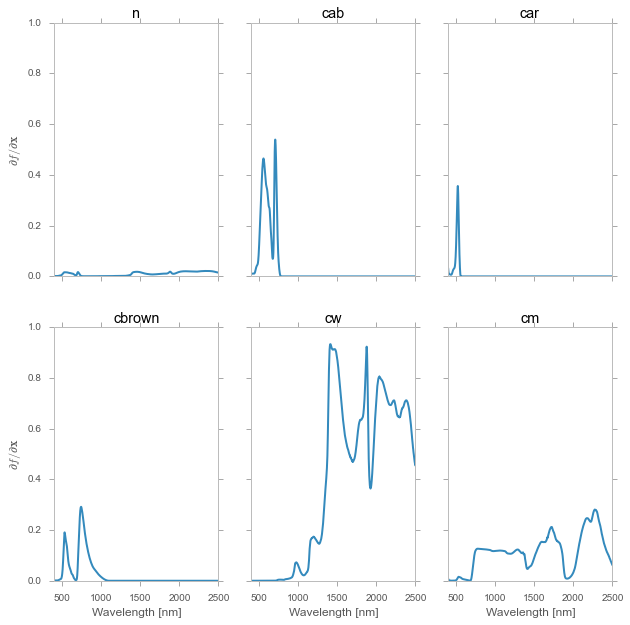

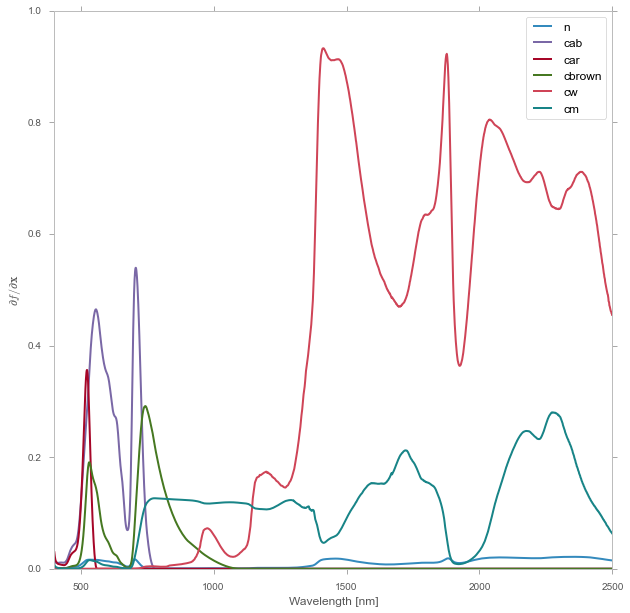

In [126]:
prospect_sensitivity_ssa()

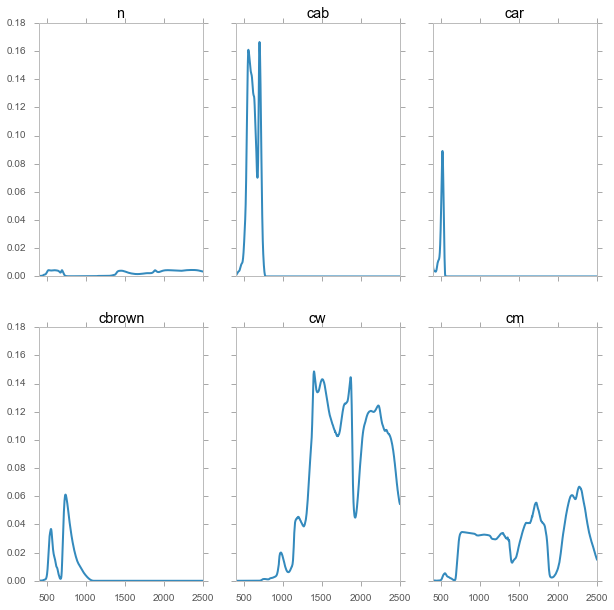

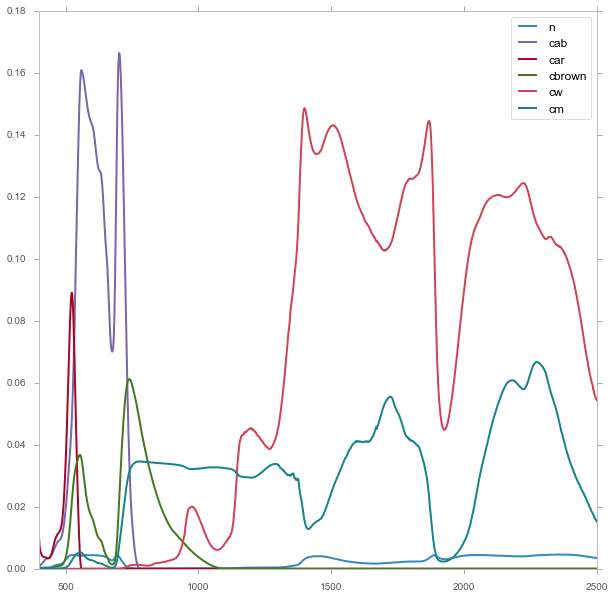

In [107]:
def prospect_sensitivity_ssa ( minvals = {'n':0, 'cab':0, 'car':0, 'cbrown': 0, 'cw':0., 'cm':0.0 },
    maxvals = { 'n': 3.5, 'cab': 280, 'car':200, 'cbrown': 1, 'cw':0.4, 'cm': 0.5 },
    do_plots=True ):
    refl = {}
    trans = {}

    for i,input_parameter in enumerate( ['n', 'cab', 'car', 'cbrown', 'cw', 'cm'] ):
        r = []
        t = []
        for s in np.arange (200)/200.:
            x = meanvals*1.
            x[i] = minvals[input_parameter] + s*(maxvals[input_parameter] - 
                                                 minvals[input_parameter])
            rr= prosail.prospect_5b ( *x )
            r.append ( rr[:, 0] )
            t.append ( rr[:, 1] )
        refl[input_parameter] = np.array(r)
        trans[input_parameter] = np.array(t)
    if do_plots:
        wv = np.arange ( 400, 2501 )
        fig, axs = plt.subplots ( figsize=(10,10), nrows=2, ncols=3, 
                                 sharex=True, sharey=True )
        axs = axs.flatten()
        for i,input_parameter in enumerate( ['n', 'cab', 'car', 'cbrown', 'cw', 'cm'] ):
            axs[i].plot( wv, (refl[input_parameter] + 
                              trans[input_parameter]).std ( axis=0), lw=2 )
            axs[i].set_title ( input_parameter )
            axs[i].set_xlim ( 400, 2500)
        plt.figure(figsize=(10,10))
        for i,input_parameter in enumerate( ['n', 'cab', 'car', 'cbrown', 'cw', 'cm'] ):
            plt.plot( wv, (refl[input_parameter] + 
                           trans[input_parameter]).std ( axis=0), lw=2, label=input_parameter )
        plt.xlim ( 400, 2500)
        plt.legend(loc='best')
prospect_sensitivity_ssa ()

        

###Fitting some leaf transmittance and reflectance spectral using PROSPECT

While you might be familiar with statistical inference studies that aim to map magnitudes of interest from data, having a physical model that describes the different processes that give rise to your measurements is in many cases a far more robust way of infering the properties of (in this case) leaves than a purely statistical approach. We will consider a simple cost function minimisation for the time being, and use this explore and gain some intuition in the area of *inverse problems*. 

The problem at hand is that we want to estimate, from a set of leaf reflectance and transmittance measurements over the solar reflective domain, the PROSPECT input parameters that result in the measurements. Since our model is able to predict the observations, the obvious thing to do is to *minimise the difference* between predictions and observations. So $M_{\rho}(\mathbf{x}, \lambda)$ and $M_{\tau}(\mathbf{x}, \lambda)$ represent the predicted reflectance and transmittance (respectively) calculated by PROSPECT with an input vector $\mathbf{x}$ (where $\mathbf{x}=\left[ N, Cab, Car, Csen, Cw,Cm\right]$) at a wavelength $\lambda$. The measurements will be denoted by $\rho(\lambda)$ and $\tau(\lambda)$, for refletance and transmittance (respectively). The least squares problem is then given by the minimisation of $J(\mathbf{x})$:

$$
J(\mathbf{x}) = \sum_{\lambda=400\,nm}^{2500\,nm} \left[ M_{rho}(\mathbf{x}, \lambda) - \rho(\lambda)  \right]^{2} + \sum_{\lambda=400\,nm}^{2500\,nm} \left[ M_{tau}(\mathbf{x}, \lambda) - \tau(\lambda)  \right]^{2}.
$$

We will be using some leaf spectra either from the field, or from the LOPEX'93 database. Below are two Python functions

* **``read_lopex_sample``** reads a particular sample from the LOPEX database. Each sample has 5 replicates.
* **``optimise_random_starts``** minimises the misfit (e.g. $J(\mathbf{x})$ above) using a set of reflectance and transmittance measurements

You will need to provide your own implementation of the cost function (``cost_function`` input parameters to ``optimise_random_starts``).



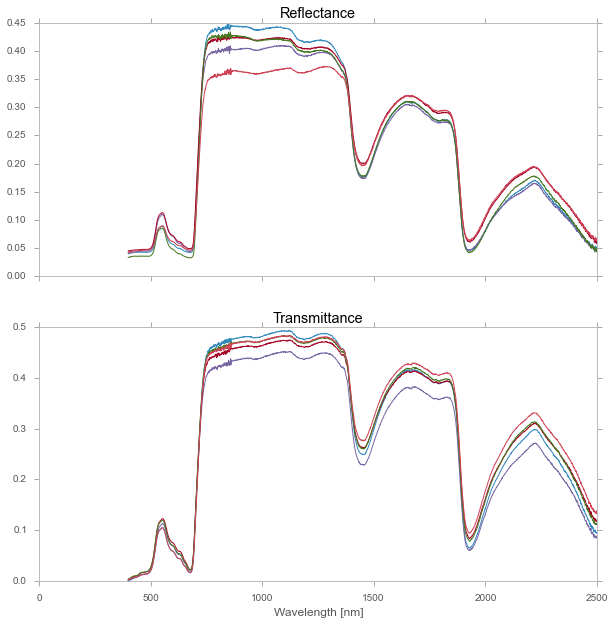

In [79]:
def read_lopex_sample ( sample_no=23, do_plot=True, db_path = "data/LOPEX93/" ):
    """Reads a sample from the LOPEX'93 database, and optionally, plots the
    reflectance and transmittance. By default, there's an oak leaf.
    
    Parameters
    ------------
    sample_no: int
        Integer to the sample number in the database
    do_plot: bool
        Whether to do the plot or not
    db_path: str
        A path for the database
    
    Returns the reflectance and transmittance associated with the sample, typically
    there are 5 replicates, so two arrays of size [5, 2101], over 400 to 2500 nm.
    """
    if sample_no < 1 or sample_no > 116:
        raise ValueError ("There are only 116 samples in this database")
    refl = np.loadtxt("%s/refl.%03d.dat" % ( db_path,  sample_no )).reshape((5,2101))
    trans = np.loadtxt("%s/trans.%03d.dat" % ( db_path,  sample_no ) ).reshape((5,2101))
    if do_plot:
        fig, axs = plt.subplots ( nrows=2, ncols=1, figsize=(10,10), sharex=True )
        for nsample in xrange(5):
            axs[0].plot ( wv, refl[nsample,:])
            axs[1].plot ( wv, trans[nsample,:])
        axs[0].set_title("Reflectance")
        axs[1].set_title("Transmittance")
        axs[1].set_xlabel("Wavelength [nm]")
    return refl, trans
refl, trans = read_lopex_sample ()


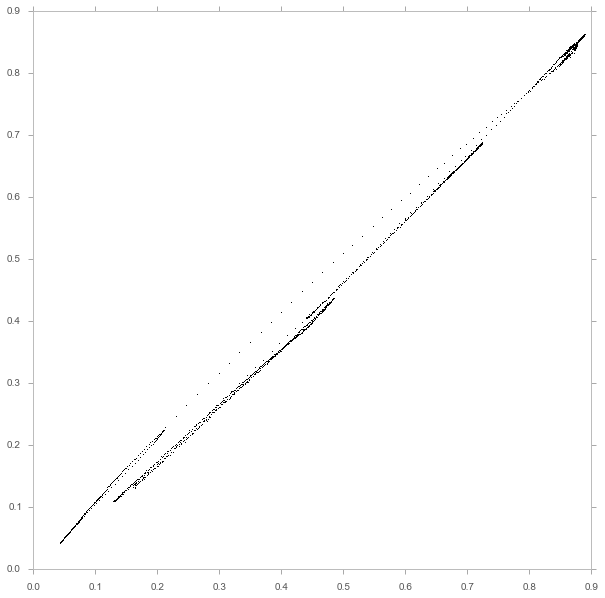

In [97]:
w = refl + trans
plt.figure(figsize=(10,10))
plt.plot ( w.mean(axis=0), w[1], 'k,')
#plt.plot ( w[0], w[2], 'r,')
#plt.plot ( w[0], w[3], 'c,')
#plt.plot ( w[0], w[4], 'y,')

Optimisation 1
	x_opt: [  1.457  35.299   6.59    0.376   0.007   0.008]
	cost:  0.567339462992
Optimisation 2
	x_opt: [  1.457  35.298   6.589   0.376   0.007   0.008]
	cost:  0.567339463109
Optimisation 3
	x_opt: [  1.457  35.299   6.59    0.376   0.007   0.008]
	cost:  0.567339463014
Optimisation 4
	x_opt: [  1.457  31.107   9.698   0.423   0.007   0.008]
	cost:  0.599406696454
Optimisation 5
	x_opt: [  1.457  35.298   6.589   0.376   0.007   0.008]
	cost:  0.56733946315
Optimisation 6
	x_opt: [  1.457  35.299   6.59    0.376   0.007   0.008]
	cost:  0.567339464198
Optimisation 7
	x_opt: [  1.457  35.298   6.59    0.376   0.007   0.008]
	cost:  0.567339462994
Optimisation 8
	x_opt: [  1.457  35.299   6.59    0.376   0.007   0.008]
	cost:  0.567339463039
Optimisation 9
	x_opt: [  1.457  35.111   6.881   0.376   0.007   0.008]
	cost:  0.567491743455
Optimisation 10
	x_opt: [  1.457  33.913   9.389   0.38    0.007   0.008]
	cost:  0.578397240228
Optimisation 11
	x_opt: [  1.457  35.298

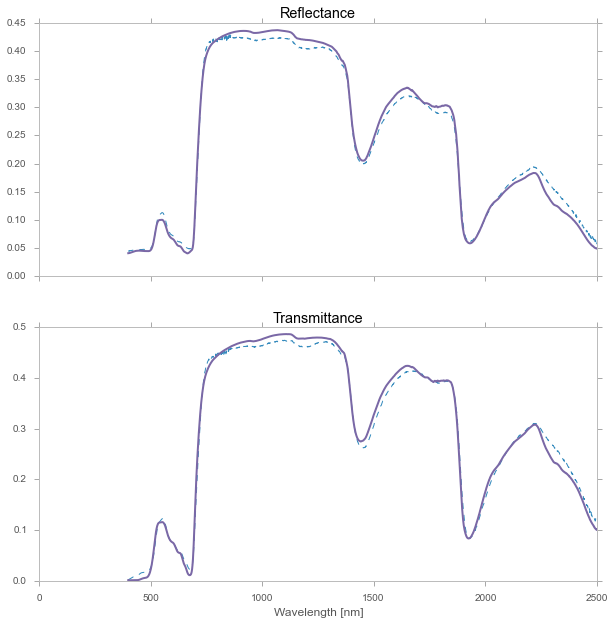

In [90]:
import scipy.optimize as opt

def optimise_random_starts (  cost_function, refl, trans, n_tries = 20, 
                            lobound = np.array ( 
                            [ 1.2, 0, 0, 0, 0.0043, 0.0017]),
         hibound = np.array ( 
                            [ 2.5, 80, 20, 1, 0.0439, 0.0152]), 
         verbose = True, do_plots=True  ):
    """A function for minimising a cost function with reflectance and transmittance 
    values. To account for the local nature of the gradient descent minimiser, the
    optimisation is started from 20 (or ``n_tries``) random points within the parameter
    boundaries. The best (lowest) solution is selected and reported. Additional options 
    let you change these boundaries, as well as the amount of information it reports back,
    and comparison "goodness of fit" plot.
    
    Parameters
    ------------
    cost_function: function
        A function that calculates the cost. Must take three parameters: a 6 element
        vector, a refletance and a transmittance measurement. 
    refl: arr
        A reflectance array measured between 400 and 2500 nm at 1nm intervals
    trans: arr
        A transmittance array measured between 400 and 2500 nm at 1nm intervals
    lobound: arr
        A 6-element array with lower boundaries for the 6 PROSPECT5b parameters
    hibound: arr
        A 6-element array with upper boundaries for the 6 PROSPECT5b parameters
    verbose: bool
        Be verbose
    do_plots: bool
        Do a plot
        
    Returns
    ----------
    The forward modelled reflectance and transmittance, the model parameters at the
    minimum and the value of the cost function there.
    """

    bounds = [ [lobound[i], hibound[i]] for i in xrange(6)]

    store = []
    
    for tries in xrange ( n_tries ):
        x0 = lobound + np.random.rand(6)*(hibound - lobound )
        retval = opt.minimize ( the_cost_function, x0, args=(refl, trans), jac=False, bounds=bounds, \
                       options={"disp":10})
        store.append ( retval )
        if verbose:
            print "Optimisation %d" % ( tries + 1)
            print "\tx_opt:", retval.x
            print "\tcost: ", retval.fun
    i =np.argmin([ res.fun for res in store ])
    fwd = prosail.prospect_5b ( *store[i].x )
    fwd_refl = fwd[:, 0]
    fwd_trans = fwd[:, 1]
    
    if verbose:
        print store[i]  
    
    if do_plots:
        fig, axs = plt.subplots ( nrows=2, ncols=1, figsize=(10,10), sharex=True )
        axs = axs.flatten()
        l1 = axs[0].plot ( wv, refl, '--', 
                    label="Measurements")
        l2 = axs[0].plot (wv, prosail.prospect_5b ( *store[i].x )[:,0], '-', lw=2, 
                     label="Fitted PROSPECT")
        axs[1].plot ( wv, trans, '--')
        axs[1].plot (wv, prosail.prospect_5b ( *store[i].x )[:,1], '-', lw=2)
        axs[0].set_title("Reflectance")
        axs[1].set_title("Transmittance")
        axs[1].set_xlabel("Wavelength [nm]")
        
    return fwd_refl, fwd_trans, store[i].x, store[i].fun


def the_cost_function ( x, refl, trans ):
    """A standard cost function. Returns the cost for an input vector ``x``"""
    retval = prosail.prospect_5b ( *x )
    cost_refl = ( refl - retval[ :, 0])**2
    cost_trans = ( trans - retval[ :, 1])**2
    return np.sum ( cost_refl  + cost_trans )

fwd_refl, fwd_trans, x, fun = optimise_random_starts (  the_cost_function, refl[2,:], trans[2,:] )

#### Some exercises...

* Try the above inversions for a couple of different samples, and try several of the replicates for each sample. Compare the results, what do you see?
* The five replicates are typically fairly noisy. We can take their difference as a statement of the **measurement uncertainty**. Can you suggest a way how you could modify the cost function in order to account for this?
* Uncertaint inputs certainly suggest uncertain outputs! Can you think of a way in which we could estimate the uncertainty in the outputs as a function of input uncertainty?


In [92]:
for samp in xrange(5):
    fwd_refl, fwd_trans, x, fun = optimise_random_starts (  the_cost_function, \
                                                refl[samp,:], trans[samp,:], verbose=False, do_plots=False )
    print samp+1, x, fun

1 [  1.43   47.998   9.317   0.168   0.008   0.007] 0.240903625006
2 [  1.477  34.664   6.62    0.513   0.008   0.011] 0.712289080963
3 [  1.457  35.299   6.59    0.376   0.007   0.008] 0.567339462983
4 [  1.402  43.906   7.635   0.277   0.008   0.008] 0.476804908209
5 [  1.343  38.567   5.787   0.753   0.006   0.009] 1.81906311602
